# G06 Tùy biến trục tọa độ

## Mục đích

Trong bài này chúng ta sẽ nói về việc thay đổi các chi tiết trên trục tọa độ.


## Tick và tick labels

Trong bài [G04](./04_label.ipynb), mình đã giới thiệu về các vạch trên trục tọa độ. Hôm nay chúng ta sẽ tìm hiểu kĩ hơn các vạch này.

Như đã giới thiệu, có hai loại vạch trục tọa độ là vạch chính và vạch phụ. Trong hầu hết các biểu đồ thông thường, vạch phụ sẽ mặc định tắt, bạn sẽ chỉ nhìn thấy vạch chính mà thôi. Tuy nhiên, đôi khi bạn sẽ muốn biểu đồ của mình có vạch phụ, ví dụ, trong biểu đồ theo thời gian, vạch chính là tuần, vạch phụ là ngày.

Bạn sẽ cần làm quen với hai lớp trong Matplotlib là `Locator` và `Formatter`. `Locator` và các lớp con của nó quy định vị trí các vạch, và `Formatter` quy định cách thức hiển thị nội dung của vạch.

Hãy xem ví dụ đầu tiên sử dụng `AutoMinorLoactor` để hiển thị vạch phụ một cách tự động.

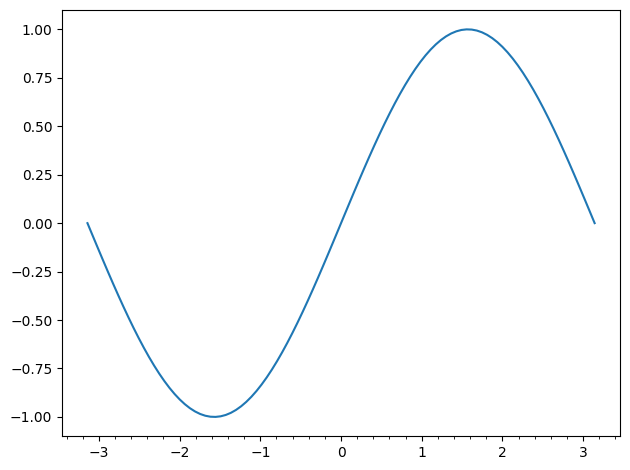

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

import numpy as np
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y = np.sin(X)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.show()

Trong ví dụ ở trên, chúng ta đã sử dụng vạch phụ cho trục X và bạn thấy rằng Matplotlib chia các khoảng 1 đơn vị thành 5 phần với 5 vạch phụ. Tuy nhiên, đối với hàm lượng giác, việc chia vạch chính theo mỗi 1 đơn vị và chia 5 vạch phụ không phù hợp. Ví dụ, chúng ta muốn vạch chính là các giá trị $0$, $\pi/4$, $\pi/2$, $3\pi/4$, v.v. còn có một vạch phụ nằm giữa các vạch này. Lúc này, chúng ta sẽ cần đến `MultipleLocator`.

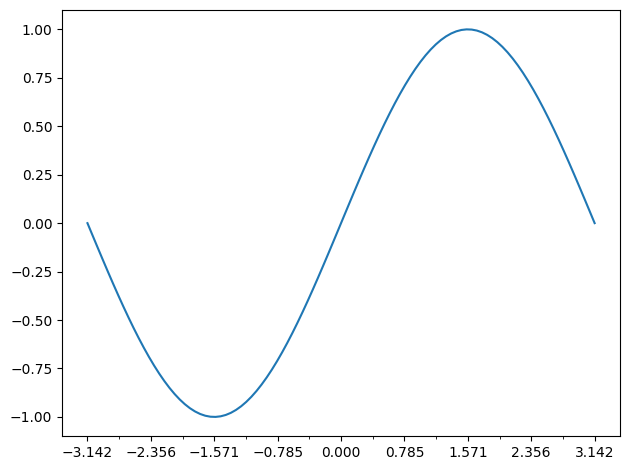

In [2]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)
ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))
plt.show()

Nhìn thì đã có cảm giác hài lòng rồi đấy, nhưng chúng ta gặp phải một vấn đề nho nhỏ: định dạng nội dung trục X cho dễ hiểu hơn. Ví dụ, thay vì 1.571, chúng ta muốn hiển thị nó là $\pi/2$. Lúc này bạn sẽ cần sử dụng `Formatter`.

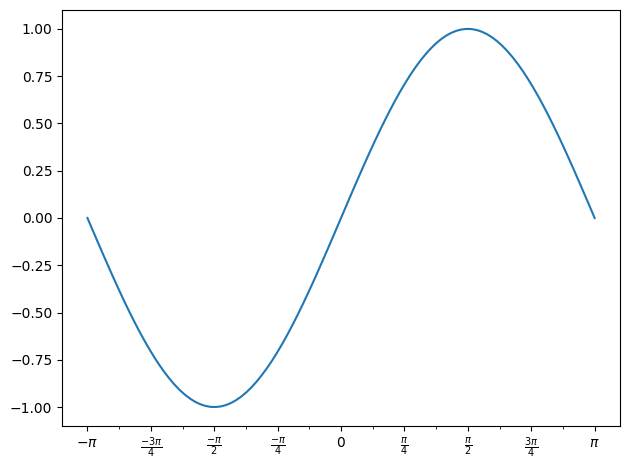

In [3]:
def pi_formatter(x, pos=None):
    k = x / np.pi * 4
    # Nếu k không phải là số tự nhiên thì không hiển thị
    k = None if abs(round(k) - k) > 0.00001 else round(k)

    if k is None:
        return ""

    # Nếu x == 0
    if k == 0:
        return "$0$"

    fmt_str = "$\\frac{{{}\\pi}}{{4}}$"

    if k % 4 == 0:
        k = k / 4
        fmt_str = "${}\\pi$"
    elif k % 4 == 2:
        k = k / 2
        fmt_str = "$\\frac{{{}\pi}}{{2}}$"

    if k == 1:
        k = ""
    elif k == -1:
        k = "-"

    return fmt_str.format(k)


fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)
ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(pi_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))
plt.show()

Trong ví dụ trên, chúng ta sử dụng hàm lambda để định dạng. Bạn cũng có thể dùng các lớp `Formatter`. Chẳng hạn, nếu chỉ muốn đơn giản là làm tròn đến 1 chữ số sau dấu thập phân, bạn có thể sử dụng `StrMethodFormatter`.

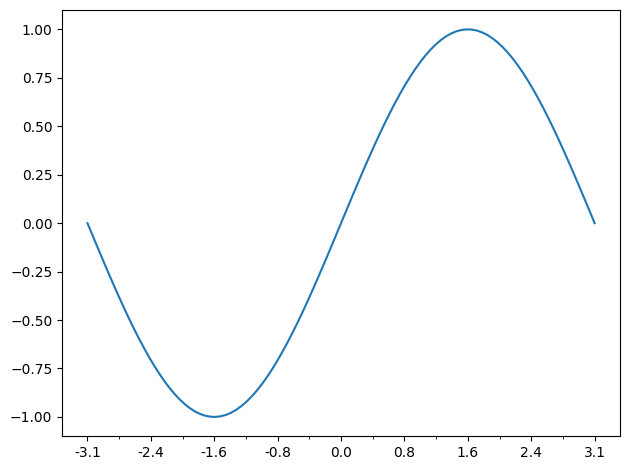

In [4]:
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)
ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.1f}"))
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))
plt.show()

Matplotlib còn nhiều `Locator` và `Formatter` khác. Bạn có thể tự tìm hiểu trên [documentation](https://matplotlib.org/stable/api/ticker_api.html) của Matplotlib nhé.


## Lưới biểu đồ

Lưới biểu đồ (grid) là các đường gióng để giúp cho người dùng ước lượng được các giá trị trên biểu đồ. Chẳng hạn, với biểu đồ trên, chúng ta sẽ muốn có các đường gióng qua bội số của $\pi/4$ cho trục X và bội số của 0.5 cho trục Y. Chúng ta dùng hàm `Axes.grid()` để bật lưới biểu đồ.

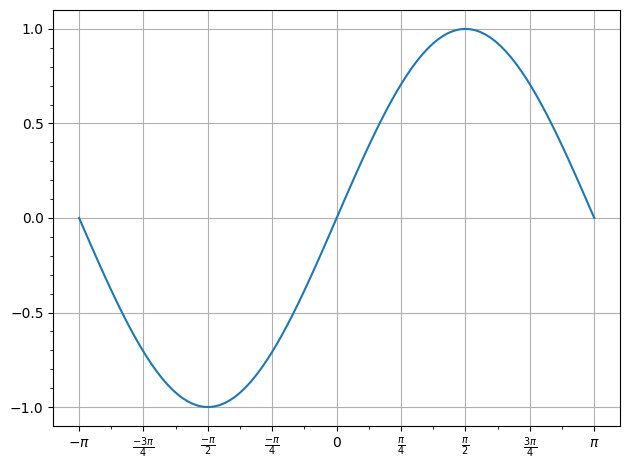

In [5]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)

ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(pi_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))

ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

ax.grid(True, which="major", axis="both")
plt.show()

## Bật / tắt các khung biểu đồ

Mặc định mỗi biểu đồ có 4 khung trên, dưới, trái, và phải. Bạn có thể tắt tất cả các khung này chỉ bằng một hàm `Axes.set_axis_off()`.

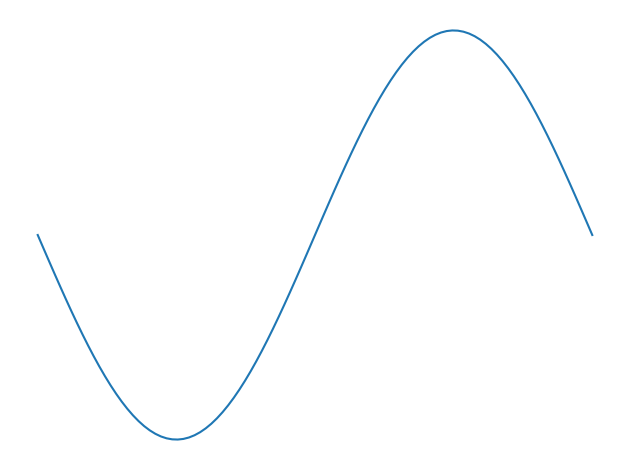

In [6]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)
ax.set_axis_off()
plt.show()

Tuy nhiên, trong đa số các trường hợp, chúng ta muốn giữ lại khung trái và khung dưới cho hai trục tọa độ. Để chỉ tăt hai khung trên và phải, bạn cần truy cập vào thuộc tính `spines`.

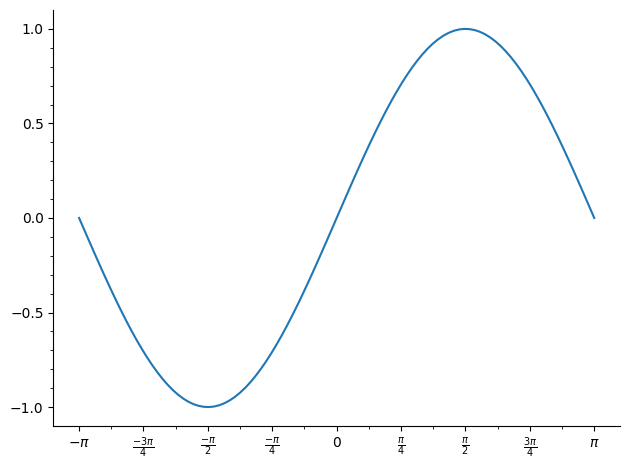

In [7]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)

ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(pi_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))

ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

## Thiết lập giới hạn cho trục tọa độ

Mặc định, Matplotlib sẽ tự động xác định các giá trị lớn nhất và nhỏ nhất trong số liệu của bạn, sau đó thêm một khoảng trống nhỏ trước và sau các giá trị này để biểu đồ hiển thị được đẹp mắt. Bạn có thể chỉnh lại giới hạn (limit) của các trục tọa độ này. Ví dụ dưới đây loại bỏ các khoảng trống trước và sau các giá trị nhỏ nhất và lớn nhất ở cả hai trục, bạn sẽ thấy biểu đồ bị sát vào trục tọa độ.

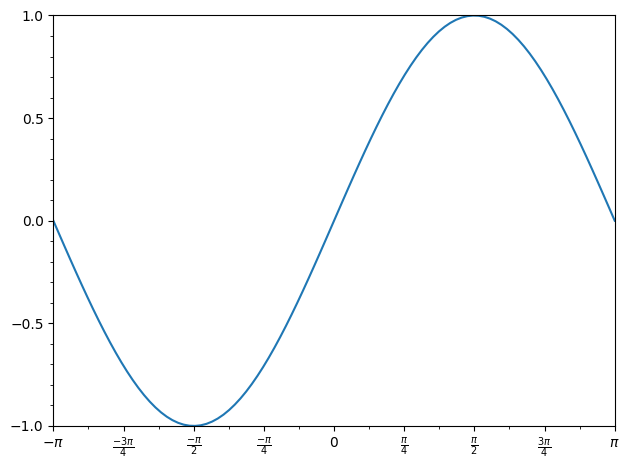

In [8]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)

ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(pi_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))

ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1, 1)

plt.show()

Trong trường hợp bạn muốn giữ khoảng trống phía trước và sau, nhưng chỉ muốn các trục tọa độ hiển thị đúng giới hạn của số liệu (ví dụ, trục Y chỉ kéo dài từ -1 đến 1), chúng ta sẽ thiết lập cho `spines`. Bằng cách này, bạn sẽ tạo cảm giác trục tọa độ "tách" ra khỏi biểu đồ.

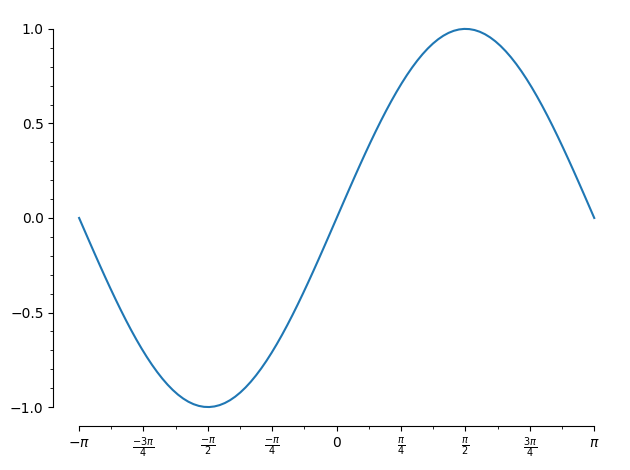

In [9]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(X, Y)

ax.xaxis.set_major_locator(MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(pi_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(np.pi / 8))

ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_bounds(-np.pi, np.pi)
ax.spines["left"].set_bounds(-1, 1)

plt.show()

## Thay đổi thang đo của trục tọa độ

Trong ví dụ dưới đây, chúng ta vẽ error bar cho các tỉ số chênh (odds ratio, OR) và khoảng tin cậy 95% của nó.

In [10]:
import pandas as pd

d = pd.DataFrame({
    "obs": ["A", "B", "C", "D"],
    "lnor": [0.38, 0.45, 1.19, -0.27],
    "se_lnor": [0.4, 0.55, 0.2, 0.31]
}).assign(
    lncil=lambda x: x["lnor"] - 1.96 * x["se_lnor"],
    lnciu=lambda x: x["lnor"] + 1.96 * x["se_lnor"]
)

d[["or", "cil", "ciu"]] = np.exp(d[["lnor", "lncil", "lnciu"]])
d["error_lower"] = d["or"] - d["cil"]
d["error_upper"] = d["ciu"] - d["or"]

d

,obs,lnor,se_lnor,lncil,lnciu,or,cil,ciu,error_lower,error_upper
0,A,0.38,0.40,-0.4040,1.1640,1.462285,0.667644,3.202719,0.794640,1.740434
1,B,0.45,0.55,-0.6280,1.5280,1.568312,0.533658,4.608950,1.034654,3.040638
2,C,1.19,0.20,0.7980,1.5820,3.287081,2.221094,4.864675,1.065987,1.577594
3,D,-0.27,0.31,-0.8776,0.3376,0.763379,0.415780,1.401580,0.347600,0.638200


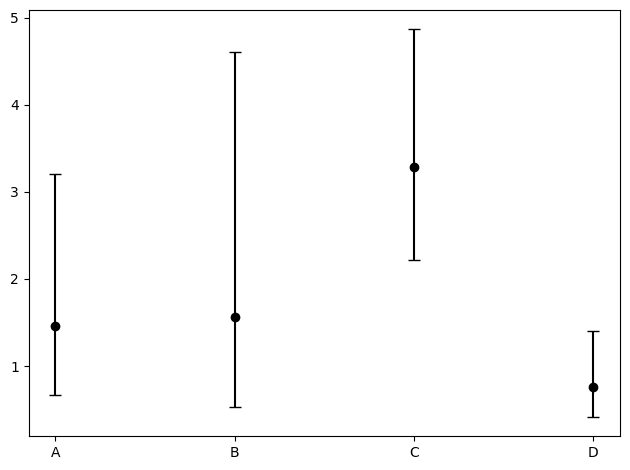

In [11]:
fig, ax = plt.subplots(tight_layout=True)
ax.errorbar(d["obs"], d["or"], d[["error_lower", "error_upper"]].T, fmt="ok", capsize=4)
plt.show()

Khi hiển thị các số liệu ở dạng tỉ số, có thể bạn không muốn hiển thị trục tọa độ theo thang (scale) tự nhiên mà theo thang logarit. Do vậy, chúng ta sẽ chuyển trục Y về dạng log.

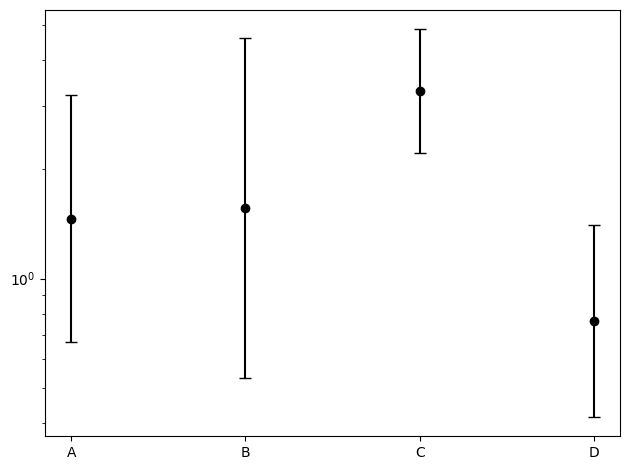

In [12]:
fig, ax = plt.subplots(tight_layout=True)
ax.errorbar(d["obs"], d["or"], d[["error_lower", "error_upper"]].T, fmt="ok", capsize=4)
ax.set_yscale("log")
plt.show()

Khi chuyển trục Y về dạng log, Matplotlib cũng tự động lựa chọn cách thức hiển thị vạch của trục Y theo dạng log. Tuy nhiên, chúng ta vẫn muốn các vạch trên trục Y là các giá trị số 1, 2, 3, 4 vì như vậy người dùng dễ theo dõi hơn. Mình đã giới thiệu hàm `Axes.set_yticks()` từ bài [G04](./04_label.ipynb) rồi.

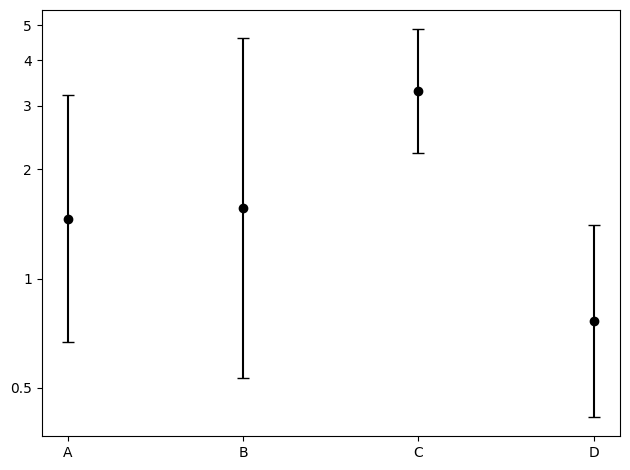

In [13]:
from matplotlib.ticker import NullLocator

fig, ax = plt.subplots(tight_layout=True)
ax.errorbar(d["obs"], d["or"], d[["error_lower", "error_upper"]].T, fmt="ok", capsize=4)
ax.set_yscale("log")
ax.set_yticks([.5, 1, 2, 3, 4, 5])
ax.yaxis.set_minor_locator(NullLocator())
ax.yaxis.set_major_formatter(lambda x, pos: f"{x:.0f}" if x >= 1 else str(x))
plt.show()

Giả sử bạn cần làm tất cả những thiết lập trên, bạn có thể gom chúng vào một từ điển và dùng hàm `Axes.set()` để thiết lập.

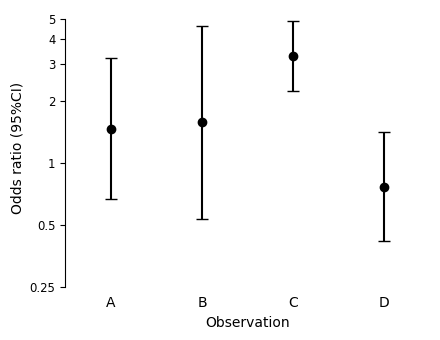

In [14]:
axes_settings = {
    "xlabel": "Observation",
    "xlim": (-.5, 3.5),
    "ylabel": "Odds ratio (95%CI)",
    "yscale": "log",
    "yticks": [.25, .5, 1, 2, 3, 4, 5],
}

fig, ax = plt.subplots(tight_layout=True, figsize=(4.5, 3.5))
ax.errorbar(d["obs"], d["or"], d[["error_lower", "error_upper"]].T, fmt="ok", capsize=4)

ax.set(**axes_settings)

ax.xaxis.set_ticks_position("none")

ax.yaxis.set_major_formatter(lambda x, pos: f"{x:.0f}" if x >= 1 else str(x))
ax.yaxis.set_minor_locator(NullLocator())
ax.yaxis.set_tick_params(labelsize="small")

ax.spines[["top", "bottom", "right"]].set_visible(False)
ax.spines["left"].set_bounds(.25, 5)

plt.show()

---

[Bài trước](./05_customize.ipynb) - [Danh sách bài](../README.md) - [Bài sau]()